# Data Science 2 (modeling)

## Computer-exam BFVM19DATASC2 - Numerical Analysis

### 2021-2022 - 1st opportunity, Fri. 22 Apr 2022, 08:30-10:00, ZP11/H1.122&D1.08

#### Materials

In the exam folder you will find the following required files:

* This exam `BFVM19DATASC2_T_DS2NumAnal_2122_DSLS_LADR.ipynb`, also as `*.html`

* Data file `rescue1.npz`

All notes, textbooks and other written or digital reference materials are permitted. The use of communication media is not allowed.

#### Instructions

Provide your answers in the code cells corresponding with each of the questions below. Unless it is explicitly state otherwise, you are allowed to use any code, functions, or modules that you deem suitable. For those questions that require a textual answer rather than python code, you may either type your answer in the cell using a python comment or insert a text-markdown cell with your typeset answer.

All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

Instructions on how to submit your answers are provided at the bottom.

***

## Michaelis–Menten enzyme kinetics

<img src="https://ib.bioninja.com.au/_Media/substrate-and-active-site_med.jpeg" width="35%" height="35%" />

In biochemistry, [Michaelis–Menten kinetics](https://www.wikiwand.com/en/Michaelis%E2%80%93Menten_kinetics) is one of the best-known models of enzyme kinetics, named after German biochemist Leonor Michaelis and Canadian physician Maud Menten. The model takes the form of an equation describing the rate of enzymatic reactions, by relating the reaction rate $v$ of the conversion of substrate $S$ to its current concentration. Its formula is given by the *Michaelis–Menten equation*:

$$
v(S) = V_\max \cdot \frac{S}{K_\text{M} + S}
$$

Here, $V_\max$ represents the maximum reaction rate achieved by the system, happening at saturating substrate concentration. When the substrate concentration is equal to the Michaelis constant $K_\text{M}$, then the conversion rate is half of $V_\max$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Michaelis_Menten_curve_2.svg/480px-Michaelis_Menten_curve_2.svg.png" />

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

### Question 1

*Threonine deaminase* is an enzyme responsible for catalyzing the conversion of L-threonine into $\alpha$-ketobutyrate and ammonia. For a given preparation, its reaction kinetics are characterized by the following parameters (expressed in hexadecimal scientific notation, in similar form as that returned by the `hex()` function):

* $V_\max$ [mmol/Ls]:<br />`0x1.400p+0`

* $K_\text{M}$ [mmol/Ls]:<br />`0x1.d00p-1`

#### Question 1a <small>[5 pts]</small>

Convert the above expressions for $V_\max$ and $K_\text{M}$ to decimal values and store these in variables `Vmax` and `KM`.

In [64]:
# ENTER YOUR SOLUTION HERE
Vmax = float.fromhex('0x1.400p+0')
print(Vmax)
KM = float.fromhex('0x1.d00p-1')
print(KM)

1.25
0.90625


<div class="alert alert-danger">
If you did not succeed in solving the previous question, then set `Vmax = 1.0` and `KM = 1.0` instead and continue with these values.
</div>

#### Question 1b <small>[10 pts]</small>

Define a 256-element array `time` with values for $t$ from `0.0` to `5.1` [s] in steps $h$ of size `0.02` [s]. Integrate the Michaelis-Menten differential equation

$$
\frac{\text{d}S}{\text{d}t} = -V_\max \cdot \frac{S}{K_\text{M} + S}
$$

using the 4<sup>th</sup>-order Runge-Kutta method with a starting value $S(0) = 1.0$ [mmol/L] at $t=0$ [s] to yield the amount of substrate $S(t)$ in a corresponding 256-element array `S_RK4`.

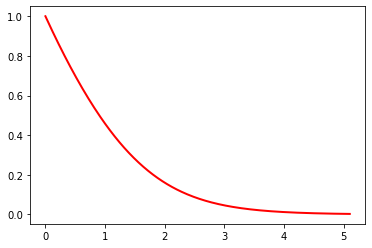

In [88]:
# ENTER YOUR SOLUTION HERE
def runge_kutta(f, y0, x0, x1, steps):
    """xs, ys = runge_kutta(f, y0, x0, x1, steps).
    4th-order Runge-Kutta method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k0 = h * f(x,y)
        k1 = h * f(x + (0.5 * h) , y + (0.5 * k0))
        k2 = h * f(x + (0.5 * h) , y + (0.5 * k1))
        k3 = h * f(x + h , y + k2)
        y = y + (k0 + (2*k1) + (2*k2) +k3) / 6
        ys.append(y)
    return xs, ys

f = lambda t,y : np.array([-Vmax * y[0]/(KM+y[0])])
x0 = 0.0
x1 = 5.1
h = 0.02
steps = int((x1-x0)/h)
y0 = [1]
time,S_RK4=runge_kutta(f, y0, x0, x1, steps+1)
S_RK4=[y[0] for y in S_RK4]
plt.plot(time, S_RK4, 'r-', lw=2, label='Runge-Kutta')

Alternatively, the Michaelis-Menten equation can be integrated analytically to find the implicit equation

$$
K_\text{M}\cdot\ln(S) + S = 1 - V_\max\cdot t
$$

For any value $t$, this equation has exactly one unique solution for $S$, but this cannot be expressed in terms of elementary functions.

<div class="alert alert-info">
<b>Note:</b> For your information, the derivation goes as follows:
$$
\frac{\text{d}S}{\text{d}t} = -V_\max \frac{S}{K_\text{M} + S}
\ \Longleftrightarrow \
\frac{K_\text{M} + S}{S} \text{d}S = -V_\max \text{d}t
\ \Longleftrightarrow \
\int\left(\frac{K_\text{M}}{S}+1\right)\text{d}S = -\int V_\max\text{d}t
\ \Longleftrightarrow \
K_\text{M}\ln(S) + S = -V_\max t + C
$$
in which the starting condition $S(0)=1$ at $t=0$ results in an integration constant $C=1$.
</div>

#### Question 1c <small>[10 pts]</small>

Apply root finding using the bisection method to solve $S$ from the above equality for all values of $t$ in the array `time` to an accuracy of 12 decimals. Store the results in another 256-element array `S_bisect`.

<div class="alert alert-success">
<b>Hint:</b> You are looking for solutions in a range $0 \leq S \leq 1$, but note that $\ln(S)$ does not exist for $S=0$.
</div>

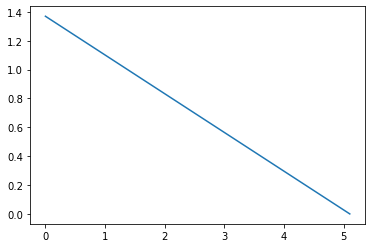

In [108]:
# ENTER YOUR SOLUTION HERE
from scipy.interpolate import interp1d
f1=interp1d(time,S_RK41,'cubic')

f = lambda x : -(KM*np.log(f1(x))+ f1(x) -1)/ (Vmax * x)

def bisection(f, a, b, tol=1e-12):
    """root = bisection(f, a, b, tol=...).
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (a,b).
    """
    lo, f_lo = a, f(a)
    if f_lo == 0.0:
        return lo
    hi, f_hi = b, f(b)
    if f_hi == 0.0:
        return hi
    #if f_lo * f_hi > 0.0:
     #   raise ValueError('Root is not bracketed')
    while abs(hi - lo) > tol:
        md = (hi + lo) / 2
        if f(md) == 0:
            return md
        if f(md) * f(hi) < 0:
            lo = md
        else:
            hi = md
    return (lo + hi) / 2.0
S = np.linspace(1e-10,1.37,256)
plt.plot(time,S[::-1])

254


<div class="alert alert-danger">
<b>Note:</b> If you did not succeed in solving Part 1, you may continue Part 2 using the data in the provided file `rescue1.npz` by uncommenting the cell below. However, you will not receive full credit for the previous questions then.
</div>

In [79]:
# # NOTE: ONLY UNCOMMENT THIS CELL IF YOU DID NOT SOLVE PART 1 YOURSELF !!!
rescue1 = np.load('./rescue1.npz'); S_RK4, S_bisect = rescue1['S_RK4'], rescue1['S_bisect']

### Question 2

As the reaction proceeds, the amount of substrate decreases to zero. Below, both your solution according to Runge-Kutta and according to bisection are plotted on the left. If your calculations were correct, these curves will appear to coincide.

However, when looking more closely, these two curves deviate slightly. We can visualize this by plotting their difference $\Delta = \left| S_\text{RK4} - S_\text{bisect}\right|$, as seen on the right.

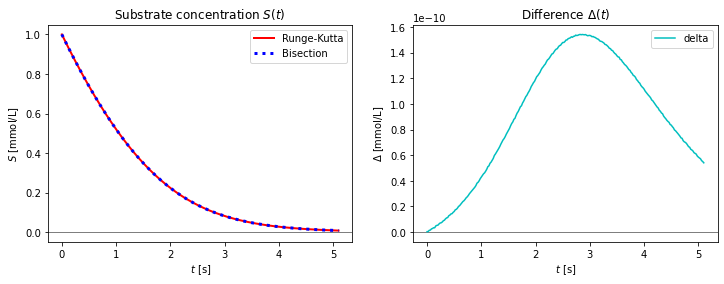

In [55]:
from scipy.interpolate import interp1d
delta = interp1d(time, np.abs(S_RK4-S_bisect), 'cubic')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.axhline(0.0, color='k', lw=0.5)
plt.plot(time, S_RK4, 'r-', lw=2, label='Runge-Kutta')
plt.plot(time, S_bisect, 'b:', lw=3, label='Bisection')
plt.xlabel('$t$ [s]'); plt.ylabel('$S$ [mmol/L]')
plt.title('Substrate concentration $S(t)$'); plt.legend()
plt.subplot(1, 2, 2); plt.axhline(0.0, color='k', lw=0.5)
plt.plot(time, delta(time), 'c', label='delta')
plt.xlabel('$t$ [s]'); plt.ylabel('$\Delta$ [mmol/L]')
plt.title('Difference $\Delta(t)$'); plt.legend(); plt.show()

#### Question 2a <small>[10 pts]</small>

Using an appropriate algorithm of your own choice, determine with at least 3 decimals accuracy at what time $t_\max$ the callable difference function `delta(t)` that is defined in the previous cell achieves its maximum. Evaluate and print the corresponding maximal difference $\Delta(t_\max)$.

In [60]:
# ENTER YOUR SOLUTION HERE
def secant(f, a, b, tol=...):
    """root = secant(f, a, b, tol=...).
    Finds a root of f(x) = 0 by the secant method.
    """
    x1 = a
    f1 = f(x1)
    if f1 == 0:
        return x1
    x2 = b
    f2 = f(x2)
    if f2 == 0:
        return x2
    while abs(x2-x1) > tol:
        x3 = (f1 * x2 - f2 *x1)/ (f1-f2)
        f3 = f(x3)
        if f3 == 0:
            return x3
        x1,x2,f1,f2=x2,x3,f2,f3
    return x2
f = lambda x : (S_RK4-S_bisect) * x
secant()

1.5428792965455074e-10

#### Question 2b <small>[5 pts]</small>

Which of the estimates for the curve $S(t)$ is most accurate in this case: `S_RK4` according to the 4<sup>th</sup>-order Runge-Kutta method, or `S_bisect` according to the bisection method? Motivate your answer.

In [ ]:
# ENTER YOUR SOLUTION HERE


### Question 3

#### Question 3a <small>[10 pts]</small>

Using only the available values in either the array `S_RK4` or `S_bisect`, determine the reaction rate

$$
v = -\frac{\text{d}S}{\text{d}t}
$$

using the *central difference approximation* at all the time points in the array `time`. Store the result in a corresponding 256-element array `rate`. For the first and last element in the array that only have one neighboring data point, use the *forward* or *backward approximation*.

In [81]:
# ENTER YOUR SOLUTION HERE
def forward_derivative(f, x, h=...):
    """df = forward_derivative(f, x, h).
    Calculates the forward difference approximation of the
    function f(x).
    """
    df = (f(x+h) - f(x)) / h
    return df

def backward_derivative(f, x, h=...):
    """df = forward_derivative(f, x, h).
    Calculates the backward difference approximation of the
    function f(x).
    """
    df = (f(x) - f(x-h)) / h
    return df

def central_derivative(f, x, h=...):
    """df = central_derivative(f, x, h).
    Calculates the central difference approximation of the
    function f(x).
    """
    df = (f(x+h)

f = lambda x: - S_RK4 / x
for i in range(len(S_RK4)):
    if i == 0:
        v = forward_derivative(f, time, h)
    elif i == (len(S_RK4))-1):
        v = backward_derivative(f, time, h)
    else:
        v = central_derivative(f, time, h)



SyntaxError: invalid syntax (3436652217.py, line 25)

#### Question 3b <small>[10 pts]</small>

Using only the available values in either the array `S_RK4` or `S_bisect`, determine the total amount of reaction product $P$ [mmol/L] that is produced during the studied 5.1-second interval according to

$$
P = \int_{0.0}^{5.1} v(t) \text{d}t = V_\max \cdot \int_{0.0}^{5.1} \frac{S}{K_\text{M} + S} \text{d}t
$$

using numerical integration based on the *composite Simpson's 1/3 rule*. Print the result with 3 decimal digits.

In [51]:
# ENTER YOUR SOLUTION HERE
from scipy.integrate import simpson
f = lambda t: S_RK4 / (KM + S_RK4) * Vmax
def simpson(f, a, b, n=...):
    """df = simpson(f, a, b, n=...).
    Calculates the definite integral of the function f(x)
    from a to b using the composite Simpson's
    rule with n subdivisions (with default n=...).
    """
    n += n % 2
    h = (b-a) / n
    I = f(a) + f(b)
    for i in range(1,n):
        if i % 2 == 0:
            I += 2 * f( a + h * i)
        elif i % 2 == 1:
            I += 4 * f( a + h * i)
    I *= (h/3)
    return I
print('{.3f}'.format(simpson(f, 0, 5.1, n=50))

SyntaxError: invalid syntax (4265471710.py, line 20)

### Question 4

During the lessons, at some point your teacher made a mistake when explaining the 4<sup>th</sup>-order Runge-Kutta method. He initially showed a method that is fully characterized by the coefficients in the third row of the following table:

| Method | Order | $\boldsymbol{c}$ | $\boldsymbol{q}$ |
| :-- | :-: | :-: | :-: |
| Euler's | 1 | $1$ | $\times$ |
| Heun's | 2 | $\frac{1}{2}$, $\frac{1}{2}$ | $1$ |
| Teacher's | $\ldots$ | $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{3}$, $\frac{1}{3}$ | $\begin{array}{ccc} 1 & & \\ 0 & \frac{1}{2} & \\ 0 & 0 & \frac{1}{2} \end{array}$ |
| Runge-Kutta's | 4 | $\frac{1}{6}$, $\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{6}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ 0 & \frac{1}{2} & \\ 0 & 0 & 1 \end{array}$ |

#### Question 4a <small>[10 pts]</small>

Complete the following function to implement this *Teacher's method*. The result should be a pair of lists with all the values of $x_i$ and $\boldsymbol{y}_i$, respectively, with $i$ ranging from zero to the number of steps.

```python
def teacher(f, y0, x0, x1, steps):
    """xs, ys = teacher(f, y0, x0, x1, steps).
    Teacher's mistaken method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    pass   # ADD YOUR OWN CODE HERE
    return xs, ys
```

In [ ]:
# ENTER YOUR SOLUTION HERE
def teacher(f, y0, x0, x1, steps):
    """xs, ys = teacher(f, y0, x0, x1, steps).
    Teacher's mistaken method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k0 = h * f(x,y)
        k1 = h * f(x + h , y + k0)
        k2 = h * f(x + (0.5 * h) , y + (0.5 * k1))
        k3 = h * f(x + (0.5 * h), y + (0.5 * k2))
        y = y + (k0 + k1 + (2*k2) + (2*k3)) / 6
        ys.append(y)
    return xs, ys


#### Question 4b <small>[10 pts]</small>

Empirically determine the *order* of convergence of this method. Do you consider this method to be viable (i.e., can you envisage using it might be appropriate)? Explain your answer.

In [ ]:
# ENTER YOUR SOLUTION HERE
This is a 4 order method.
I think it is workable, it combine different step of deverivate y.


***

<div class="alert alert-warning">
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JaneDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Submit your evaluated notebook by clicking the title of the BlackBoard assignment, attaching it, and clicking the submission button.
</li><li>
After getting clearance from the exam supervisor, you are free to leave.
</li></ol>
</div>

#### Success!